In [3]:
import pandas as pd 
import numpy as np

In [5]:
df= pd.read_csv("tayara_cars.csv")

In [6]:
df.head()

,Unnamed: 0,location,km,annee,marque,model,date,price,carburant,puissance,boite,cylindre
0,0,"Ben arous, Ezzahra",1.0,2021,Volkswagen,Polo,14 mars 2021,12500.0,Diesel,4,Jaune,Compacte
1,1,"Tunis, Tunis",180000.0,2008,Opel,Astra,14 mars 2021,21500.0,Diesel,1,Noir,Berline
2,2,"Ben arous, Ezzahra",1.0,2021,Volkswagen,Polo,14 mars 2021,12500.0,Diesel,4,Jaune,Compacte
3,3,"Tunis, Tunis",180000.0,2008,Opel,Astra,14 mars 2021,21500.0,Diesel,1,Noir,Berline
4,4,"Monastir, Autres villes",200000.0,1999,Renault,12,14 mars 2021,111111.0,Essence,4,Blanc,Autres


In [7]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.head()

,location,km,annee,marque,model,date,price,carburant,puissance,boite,cylindre
0,"Ben arous, Ezzahra",1.0,2021,Volkswagen,Polo,14 mars 2021,12500.0,Diesel,4,Jaune,Compacte
1,"Tunis, Tunis",180000.0,2008,Opel,Astra,14 mars 2021,21500.0,Diesel,1,Noir,Berline
2,"Ben arous, Ezzahra",1.0,2021,Volkswagen,Polo,14 mars 2021,12500.0,Diesel,4,Jaune,Compacte
3,"Tunis, Tunis",180000.0,2008,Opel,Astra,14 mars 2021,21500.0,Diesel,1,Noir,Berline
4,"Monastir, Autres villes",200000.0,1999,Renault,12,14 mars 2021,111111.0,Essence,4,Blanc,Autres


In [9]:
newCols = {'km':'Kms_Driven','annee':'year','marque':'brand','carburant':'Fuel_Type','boite':'Color','puissance':'Horse_pow','cylindre':'body_style'}
df.rename(columns=newCols, inplace=True)

In [13]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10730 entries, 0 to 10729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    10730 non-null  object 
 1   Kms_Driven  10723 non-null  float64
 2   year        10728 non-null  object 
 3   brand       10728 non-null  object 
 4   model       10727 non-null  object 
 5   date        10730 non-null  object 
 6   price       10725 non-null  float64
 7   Fuel_Type   10727 non-null  object 
 8   Horse_pow   10727 non-null  object 
 9   Color       10727 non-null  object 
 10  body_style  10727 non-null  object 
dtypes: float64(2), object(9)
memory usage: 922.2+ KB


,Kms_Driven,price
count,1.072300e+04,10725.000000
mean,8.369274e+06,22050.703590
std,1.211033e+08,23439.731874
min,-3.740000e+05,5.000000
25%,2.465000e+02,5200.000000
50%,9.000000e+04,17800.000000
75%,1.980000e+05,30000.000000
max,2.147484e+09,200000.000000


i already filtered the cars with 0dt price tags and >=200 000dt because i noticed people put their phone number in there too
to do:
    -normalize Kms_driven numbers , and price tag ,some people refer to 10 000dt as 10dt
    -convert year to integer
    -add a car age column 
        

In [15]:
df[['city','region']] = df.location.str.split(', ',expand=True)
df.drop('location',axis=1, inplace=True)
df.head()

,Kms_Driven,year,brand,model,date,price,Fuel_Type,Horse_pow,Color,body_style,city,region
0,1.0,2021,Volkswagen,Polo,14 mars 2021,12500.0,Diesel,4,Jaune,Compacte,Ben arous,Ezzahra
1,180000.0,2008,Opel,Astra,14 mars 2021,21500.0,Diesel,1,Noir,Berline,Tunis,Tunis
2,1.0,2021,Volkswagen,Polo,14 mars 2021,12500.0,Diesel,4,Jaune,Compacte,Ben arous,Ezzahra
3,180000.0,2008,Opel,Astra,14 mars 2021,21500.0,Diesel,1,Noir,Berline,Tunis,Tunis
4,200000.0,1999,Renault,12,14 mars 2021,111111.0,Essence,4,Blanc,Autres,Monastir,Autres villes


In [16]:
#check for null values
df.isnull().sum()

Kms_Driven    7
year          2
brand         2
model         3
date          0
price         5
Fuel_Type     3
Horse_pow     3
Color         3
body_style    3
city          0
region        0
dtype: int64

In [25]:
df.dropna()


,Kms_Driven,year,brand,model,date,price,Fuel_Type,Horse_pow,Color,body_style,city,region,Current Year
0,1.0,2021,Volkswagen,Polo,14 mars 2021,12500.0,Diesel,4,Jaune,Compacte,Ben arous,Ezzahra,2020
1,180000.0,2008,Opel,Astra,14 mars 2021,21500.0,Diesel,1,Noir,Berline,Tunis,Tunis,2020
2,1.0,2021,Volkswagen,Polo,14 mars 2021,12500.0,Diesel,4,Jaune,Compacte,Ben arous,Ezzahra,2020
3,180000.0,2008,Opel,Astra,14 mars 2021,21500.0,Diesel,1,Noir,Berline,Tunis,Tunis,2020
4,200000.0,1999,Renault,12,14 mars 2021,111111.0,Essence,4,Blanc,Autres,Monastir,Autres villes,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,86000.0,2013,Peugeot,208,6 février 2021,28800.0,Essence,5,Bleu,Compacte,Ben arous,Radès,2020
10726,232000.0,2009,Renault,Megane,6 février 2021,23500.0,Essence,6,Noir,Berline,Gafsa,Redeyef,2020
10727,101000.0,2015,Kia,Rio,6 février 2021,37500.0,Essence,5,Noir,Berline,Sfax,Sfax Médina,2020
10728,273000.0,2008,Volkswagen,Passat,6 février 2021,29000.0,Essence,7,Noir,Autres,Tataouine,Tataouine,2020


In [27]:
#df['year']=df['year'].astype(int)
#df.drop(df[df['year']=='BMW'].index,inplace=True)
df = df[~df['year'].isnull()]


In [28]:
df['year']=df['year'].astype(int)

<ipython-input-28-d065cfac7303>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year']=df['year'].astype(int)


In [36]:
df.dtypes

Kms_Driven      float64
year              int32
brand            object
model            object
date             object
price           float64
Fuel_Type        object
Horse_pow        object
Color            object
body_style       object
city             object
region           object
Current Year      int64
dtype: object

In [ ]:
#handling year column:

In [39]:
df.year.describe()

count    1.072700e+04
mean     5.382364e+05
std      2.967504e+07
min     -2.001000e+03
25%      2.001000e+03
50%      2.009000e+03
75%      2.014000e+03
max      2.147484e+09
Name: year, dtype: float64

In [54]:
#removing faulty years : cars that were made before 1800 and after 2021
absurd_year_past=df.year > 2021
absurd_year_future=df.year < 1800
print(absurd_year_past)
print(absurd_year_future)
absurd_year_past.unique()
absurd_year_future.unique()

0        False
1        False
2        False
3        False
4        False
         ...  
10725    False
10726    False
10727    False
10728    False
10729    False
Name: year, Length: 10271, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
10725    False
10726    False
10727    False
10728    False
10729    False
Name: year, Length: 10271, dtype: bool


array([False])

In [55]:
absurd_year=absurd_year_past|absurd_year_future

In [56]:
df.drop(df[absurd_year].index,inplace=True)


In [58]:
df['Current Year']=2021
df['nb_year']=df['Current Year']- df['year']
df=df.drop(['Current Year'],axis=1)

df.head()

,Kms_Driven,year,brand,model,date,price,Fuel_Type,Horse_pow,Color,body_style,city,region,nb_year
0,1.0,2021,Volkswagen,Polo,14 mars 2021,12500.0,Diesel,4,Jaune,Compacte,Ben arous,Ezzahra,0
1,180000.0,2008,Opel,Astra,14 mars 2021,21500.0,Diesel,1,Noir,Berline,Tunis,Tunis,13
2,1.0,2021,Volkswagen,Polo,14 mars 2021,12500.0,Diesel,4,Jaune,Compacte,Ben arous,Ezzahra,0
3,180000.0,2008,Opel,Astra,14 mars 2021,21500.0,Diesel,1,Noir,Berline,Tunis,Tunis,13
4,200000.0,1999,Renault,12,14 mars 2021,111111.0,Essence,4,Blanc,Autres,Monastir,Autres villes,22


In [59]:
df.describe(include='all')

,Kms_Driven,year,brand,model,date,price,Fuel_Type,Horse_pow,Color,body_style,city,region,nb_year
count,1.026600e+04,10271.00000,10271,10270,10271,10266.000000,10270,10270,10270,10270,10271,10271,10271.00000
unique,NaN,NaN,60,525,37,NaN,4,317,32,36,24,286,NaN
top,NaN,NaN,Volkswagen,Polo,13 mars 2021,NaN,Essence,5,Blanc,Berline,Tunis,Autres villes,NaN
freq,NaN,NaN,1498,497,811,NaN,6413,3208,2431,2766,3260,4799,NaN
mean,7.587369e+06,2007.39704,NaN,NaN,NaN,22625.948763,NaN,NaN,NaN,NaN,NaN,NaN,13.60296
std,1.156824e+08,9.31929,NaN,NaN,NaN,23572.252560,NaN,NaN,NaN,NaN,NaN,NaN,9.31929
min,-3.740000e+05,1880.00000,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
25%,2.500000e+02,2002.00000,NaN,NaN,NaN,6000.000000,NaN,NaN,NaN,NaN,NaN,NaN,7.00000
50%,9.400000e+04,2010.00000,NaN,NaN,NaN,18500.000000,NaN,NaN,NaN,NaN,NaN,NaN,11.00000
75%,1.999295e+05,2014.00000,NaN,NaN,NaN,31000.000000,NaN,NaN,NaN,NaN,NaN,NaN,19.00000


In [ ]:
#handling Kms_driven

In [60]:

df.Kms_Driven.describe()


count    1.026600e+04
mean     7.587369e+06
std      1.156824e+08
min     -3.740000e+05
25%      2.500000e+02
50%      9.400000e+04
75%      1.999295e+05
max      2.147484e+09
Name: Kms_Driven, dtype: float64

In [61]:
#as u can see we have negative values
drop_negatives=df.Kms_Driven < 0
df.drop(df[drop_negatives].index, inplace=True)
df.Kms_Driven.describe()

count    1.025800e+04
mean     7.593354e+06
std      1.157273e+08
min      0.000000e+00
25%      2.500000e+02
50%      9.400000e+04
75%      1.999990e+05
max      2.147484e+09
Name: Kms_Driven, dtype: float64

In [62]:
#handling prices
df.price.describe()

count     10258.000000
mean      22629.122636
std       23579.436841
min           5.000000
25%        6000.000000
50%       18500.000000
75%       31000.000000
max      200000.000000
Name: price, dtype: float64

In [63]:
#some people refer to 10 000dt as 10dt
below100 = df.price < 100
df.loc[below100,'price'] *= 1000

In [65]:
df.price.describe(include="all")

count     10258.000000
mean      27597.243712
std       22195.477054
min         100.000000
25%       13700.000000
50%       23000.000000
75%       35000.000000
max      200000.000000
Name: price, dtype: float64

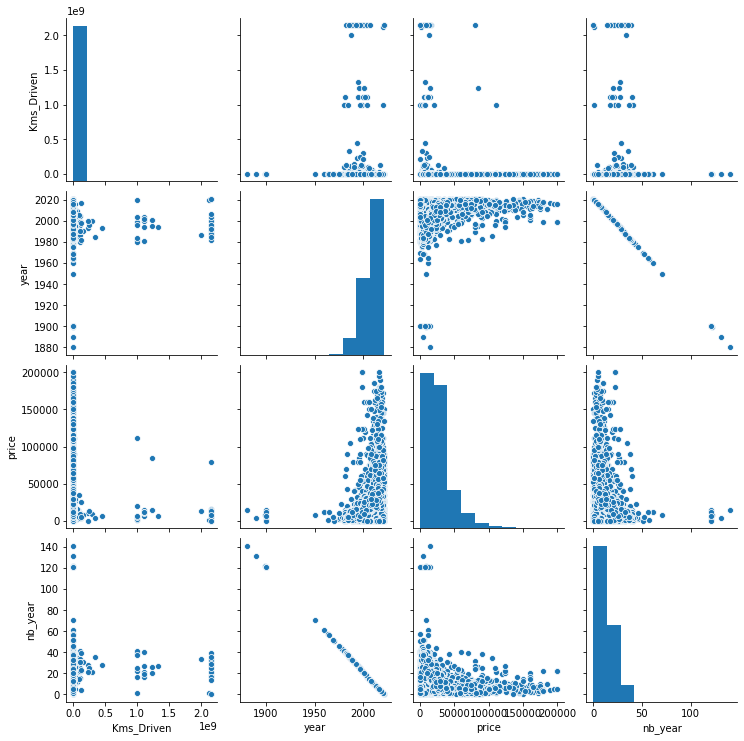

In [66]:
import seaborn as sns
sns.pairplot(df)

In [69]:
#date column serves no perpose
df.drop(columns=['date'],inplace=True)

In [74]:
#handling horse power column

outliers= df.loc[~df['Horse_pow'].astype(str).str.isdigit(), 'Horse_pow'].tolist() #finding the outlaws that aren't a null value
print(outliers)

['-1', 'Blanc', '-1']


In [75]:
df = df[~df['Horse_pow'].isin(outlaws)]#removing outlaws from Horse power Column


In [77]:
df = df[~df['Horse_pow'].isnull()]#removing nulled value from Horse Pow Column
df['Horse_pow']=df['Horse_pow'].astype(int)#converting Horse Power Column Type to integer

In [78]:
df.Horse_pow.describe()

count    1.025900e+04
mean     2.113539e+06
std      6.155507e+07
min      0.000000e+00
25%      5.000000e+00
50%      6.000000e+00
75%      7.000000e+00
max      2.147484e+09
Name: Horse_pow, dtype: float64

In [84]:
# 0 horse power is not logical so we're gonna assign the mean value to them
zeroHP = df.Horse_pow == 0.0

df.loc[zeroHP,'Horse_pow']= df.Horse_pow.mean()

In [85]:
df.Horse_pow.describe()

count    1.025900e+04
mean     2.132081e+06
std      6.155475e+07
min      1.000000e+00
25%      5.000000e+00
50%      6.000000e+00
75%      7.000000e+00
max      2.147484e+09
Name: Horse_pow, dtype: float64

In [88]:
df.Fuel_Type.unique()

array(['Diesel', 'Essence', 'Electrique', 'Hybride'], dtype=object)

In [89]:
#region is filled with Autre villes , so we're going to remove it and only keep the city column
df.drop(["region"],axis=1,inplace=True)


In [96]:
#making sure we have all the cities: 24
print(df.city.unique())

len(df.city.unique())

['Ben arous' 'Tunis' 'Monastir' 'Sfax' 'Nabeul' 'Sousse' 'Ariana'
 'Zaghouan' 'Bizerte' 'Siliana' 'Gafsa' 'Le kef' 'Tataouine' 'Jendouba'
 'Médenine' 'Béja' 'Kairouan' 'La manouba' 'Gabès' 'Kébili' 'Sidi bouzid'
 'Mahdia' 'Tozeur' 'Kasserine']


24

In [102]:
df.Color.unique()

array(['Jaune', 'Noir', 'Blanc', 'Nouveau', 'Marron', 'Gris', 'Bleu',
       'Beige', 'Manuelle', 'Argent', 'Rouge', 'Vert', 'Camel',
       'Avec kilométrage', 'Autre', 'Doré', 'Berline', '4 x 4', 'Corail',
       'Automatique', 'Violet', 'Orange', 'Autres', 'Multicolore',
       'Utilitaire', 'Compacte', 'Cabriolet', 'Monospace', 'RS',
       'Pick up', 'Rose', 'Pièces manquantes'], dtype=object)

In [103]:
df.drop(["Color"],axis=1,inplace=True)


In [104]:
df.brand.unique()

array(['Volkswagen', 'Opel', 'Renault', 'Peugeot', 'BMW', 'Isuzu',
       'Nissan', 'Citroen', 'Mercedes-Benz', 'Fiat', 'Ford', 'Mazda',
       'Hyundai', 'Mitsubishi', 'Audi', 'Seat', 'Chevrolet', 'Kia',
       'Toyota', 'Rover', 'Suzuki', 'Ssangyong', 'Iveco', 'Autres',
       'Acrea', 'Skoda', 'AC', 'Jeep', 'Smart', 'Dacia', 'Land Rover',
       'Mahindra', 'Porsche', 'Daihatsu', 'mini', 'Honda', 'Alfa Romeo',
       'Chery', 'Daewoo', 'Volvo', 'Jaguar', 'Aston Martin', 'Dodge',
       'UFO', 'Masey Ferguson', 'Changhe', 'Cadillac', 'Geely', 'lancia',
       'Infiniti', 'Chrysler', 'Subaru', 'Foton', 'BYD', 'Ferrari',
       'Bentley', 'Maserati', 'Acura', 'Hummer'], dtype=object)

In [105]:
df.model.nunique()

525

In [106]:
df.isnull().sum()

Kms_Driven    5
year          0
brand         0
model         0
price         5
Fuel_Type     0
Horse_pow     0
body_style    0
city          0
nb_year       0
dtype: int64

In [107]:
df = df[~df['Kms_Driven'].isnull()]
df = df[~df['price'].isnull()]


In [108]:
df.isnull().sum()

Kms_Driven    0
year          0
brand         0
model         0
price         0
Fuel_Type     0
Horse_pow     0
body_style    0
city          0
nb_year       0
dtype: int64

In [112]:
df.body_style.unique()

array(['Compacte', 'Berline', 'Autres', 'Manuelle', '4 x 4', '1.2',
       'Avec kilométrage', 'Utilitaire', 'Monospace', 'Cabriolet', '1.9',
       '1.4', '2.8', '&gt;4.0', '1.1', 'Nouveau', 'Pick up',
       'Automatique', '1.6', 'RS', '2.5', '3.0', '2.0', '2.2', '1.5',
       '&lt;1.0', 'Pièces manquantes', '1.7', '1.8', '1.3', '3.2', '3.5',
       '2.7', 'Non dédouanné', '2.3', '2.4'], dtype=object)

In [125]:
df['body_style'].describe()

count       10254
unique         36
top       Berline
freq         2760
Name: body_style, dtype: object

NameError: name 'df' is not defined

In [5]:
df.to_csv('clean_tayara_cars_dataset.csv')

AttributeError: module 'pandas' has no attribute 'to_csv'

In [28]:
data=pd.read_csv('clean_tayara_cars.csv')

In [14]:
polo=data.loc[data['model']=='Polo']

In [15]:
polo.boite.unique()

array(['Jaune', 'Nouveau', 'Blanc', 'Noir', 'Vert', 'Gris', 'Marron',
       'Manuelle', 'Bleu', 'Beige', 'Avec kilométrage', 'Multicolore',
       'Doré', 'Autres', 'Autre', 'Violet', 'Berline', 'Rouge', 'Argent'],
      dtype=object)

In [16]:
polo.cylindre.unique()

array(['Compacte', 'Manuelle', 'Autres', 'Berline', 'Avec kilométrage',
       'RS', '1.2', '1.4', '4 x 4', 'Utilitaire', '&lt;1.0', 'Cabriolet',
       'Nouveau', '1.1', '1.6', '&gt;4.0', '1.9', '3'], dtype=object)

In [30]:
data.drop(["body_style"],axis=1,inplace=True)


In [32]:
#data.drop(["Unnamed: 0"],axis=1,inplace=True)
data=data[data['Horse_pow']<20]

data.head()


,Kms_Driven,year,brand,model,price,Fuel_Type,Horse_pow,city,nb_year
0,1.0,2021,Volkswagen,Polo,12500.0,Diesel,4.0,Ben arous,0
1,180000.0,2008,Opel,Astra,21500.0,Diesel,1.0,Tunis,13
2,1.0,2021,Volkswagen,Polo,12500.0,Diesel,4.0,Ben arous,0
3,180000.0,2008,Opel,Astra,21500.0,Diesel,1.0,Tunis,13
4,200000.0,1999,Renault,12,111111.0,Essence,4.0,Monastir,22


In [33]:
data.to_csv("clean_tayara_cars.csv")

In [ ]:
data = data.groupby('brand').filter(lambda x: len(x) > 50)
data['brand'].value_counts()